# Correlation
Variables within a dataset can be related for lots of reasons.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(1)
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [2]:
df = pd.DataFrame()
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
df[0] = data1
df[1] = data2
df.head()

,0,1
0,132.486907,180.954546
1,87.764872,113.439787
2,89.436565,144.516408
3,78.540628,125.300304
4,117.308153,152.197387


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=19.620


<AxesSubplot:xlabel='0', ylabel='1'>

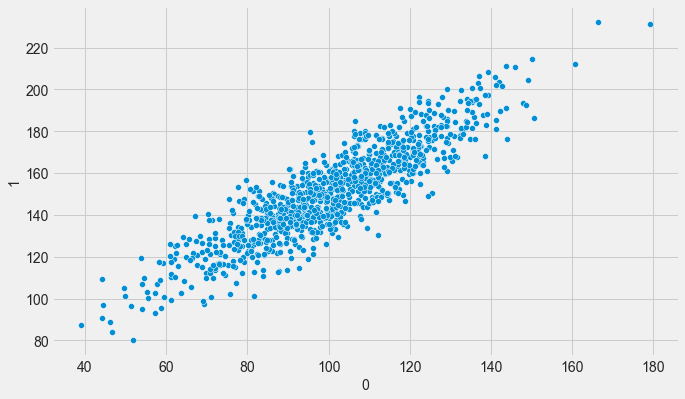

In [3]:
print(f'data1: mean={np.mean(df[0]):.3f} stdv={np.std(df[0]):.3f}')
print(f'data2: mean={np.mean(df[1]):.3f} stdv={np.std(df[0]):.3f}')
sns.scatterplot(data=df, x=0, y=1)

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity

## Covariance
This relationship can be summarized between two variables, called the covariance.
cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

In [4]:
np.cov(data1, data2)

array([[385.33297729, 389.7545618 ],
       [389.7545618 , 500.38006058]])

# Pearson’s Correlation

The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

![Correlation](media/correlation.png "Correlation")

In [5]:
df.corr()

,0,1
0,1.000000,0.887612
1,0.887612,1.000000


<AxesSubplot:>

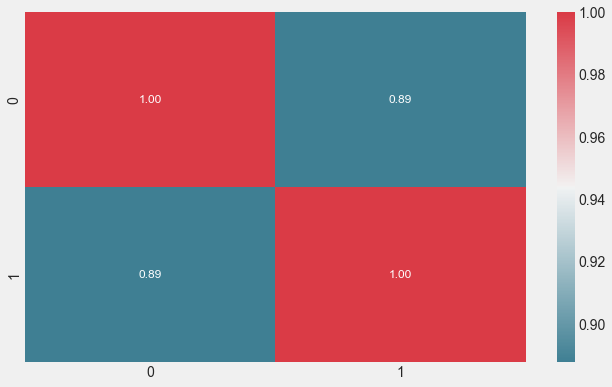

In [6]:
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot_kws={"fontsize": 12}, fmt=".2f")

# Examples

In [7]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

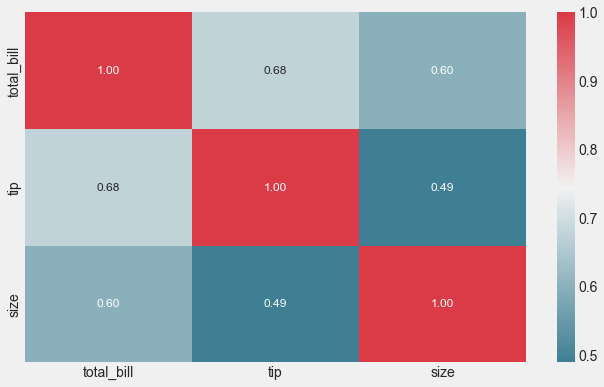

In [8]:
sns.heatmap(tips.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot_kws={"fontsize": 12}, fmt=".2f")

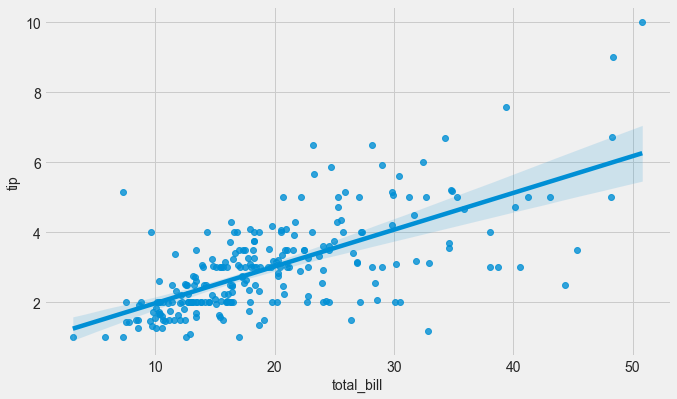

In [9]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

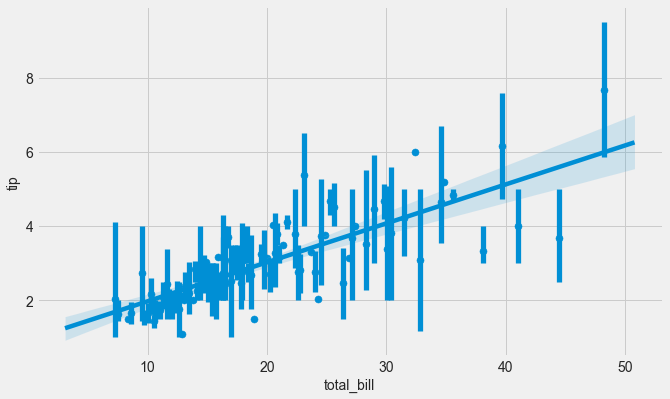

In [10]:
sns.regplot(x="total_bill", y="tip", data=tips, x_estimator=np.mean, x_bins=100)